- title: RDKit 入门：修改分子与搜索子结构
- slug: rdkit-modify-search-molecule
- date: 2023-01-03
- tags: RDKit, Python
- summary: 介绍使用 RDKit 修改分子以及在分子中搜索 SMARTS 子结构并高亮绘制子结构的方法。

## 修改分子

In [1]:
from rdkit import Chem

### 加氢与去氢

RDKit 默认隐藏了分子中的氢原子，但在优化分子的 3D 构象时，通常又需要在分子中加氢。实现加氢操作可以使用 `AddHs()`，去氢可以使用 `RemoveHs()`。

In [2]:
m = Chem.MolFromSmiles('Cc1ccccc1')
print(m.GetNumAtoms())
m2 = Chem.AddHs(m)
print(m2.GetNumAtoms())
m3 = Chem.RemoveHs(m2)
print(m3.GetNumAtoms())


7
15
7


### 凯库勒式的转化

RDKit 能将芳环中的化学键以芳香键的形式存储下来，使用 `GetBondType()` 查询化学键类型，化学键将显示为 `AROMATIC` 类型。

In [3]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m.GetBondWithIdx(1).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

使用 `Kekulize()` 可以将分子转化为凯库勒式，那么芳香键就会表示为单键或双键形式。

In [4]:
Chem.Kekulize(m)
print(m.GetBondWithIdx(1).GetBondType())
print(m.GetBondWithIdx(2).GetBondType())

DOUBLE
SINGLE


虽然显示为单键与双键，使用 `GetIsAromatic()` 查询化学键是否具有芳香性，可以发现化学键仍具有芳香性，这与化学定义一致。

In [5]:
m.GetBondWithIdx(1).GetIsAromatic()

True

若要将分子转化为凯库勒式的同时去除分子化学键的芳香性，可以使用 `Kekulize(clearAromaticFlags=True)` 修改分子，分子中的芳香键标记就会被去除。

In [6]:
Chem.Kekulize(m, clearAromaticFlags=True)
m.GetBondWithIdx(1).GetIsAromatic()

False

使用 `SanitizeMol()` 可以将凯库勒式形式的分子转化为原始形式，化学键类型也将以芳香键标记。

In [7]:
Chem.SanitizeMol(m)
print(m.GetBondWithIdx(1).GetBondType())
print(m.GetBondWithIdx(2).GetBondType())


AROMATIC
AROMATIC


### Atom 类与 Bond 类

RDKit `Chem.rdchem` 模块中定义了 `Atom` 类与 `Bond` 类，其中以 Get 为前缀的方法是查询相应的属性，而以 Set 为前缀的方法就是修改分子的原子和化学键，以下列举了一部分修改操作。

#### Atom 类

- `SetAtomicNum(int)`：通过原子序数改变指定原子。
- `SetChiralTag(Chem.rdchem.ChiralType)`：设定指定原子的手性。例如
    - `Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW` 为 S 构型；
    - `Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW` 为 R 构型。
- `SetFormalCharge(int)`：设定原子携带电荷数量。
- `SetHybridization(Chem.rdchem.HybridizationType)`：设定原子杂化类型。
- `SetIsAromatic(bool)`：设定原子是否具有芳香性。
- `SetIsotope(int)`：设定原子的同位素。
- `SetNoImplicit(bool)`：设定原子是否带隐式氢。
- `SetNumExplicitHs(int)`：设定原子固定显示氢的数量。
- `SetNumRadicalElectrons(int)`：设定指定原子未成对电子数量。

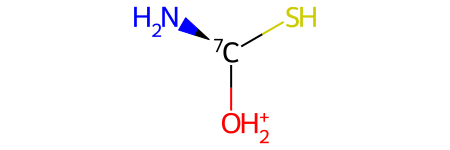

In [8]:
m = Chem.MolFromSmiles('OC(N)C')
m.GetAtomWithIdx(3).SetAtomicNum(16)
m.GetAtomWithIdx(1).SetChiralTag(Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW)
m.GetAtomWithIdx(1).SetIsotope(7)
m.GetAtomWithIdx(0).SetFormalCharge(1)
m

在修改分子后通常还需要检查步骤，避免出错，还可以输出修改后分子的 SMILES。

In [9]:
Chem.SanitizeMol(m)
Chem.MolToSmiles(m)

'N[7C@H]([OH2+])S'

#### Bond 类

- `SetBondDir(Chem.rdchem.BondDir)`：设定化学键显示形式。
- `SetBondType(Chem.rdchem.BondType)`：设定化学键类型。
- `SetIsAromatic(bool)`：设定化学键是否为芳香键。
- `SetIsConjugated(bool)`：设定化学键是否共轭。
- `SetStereo(Chem.rdchem.BondStereo)`：设定双键的几何构型，例如
    - `Chem.rdchem.BondStereo.STEREOCIS` 为 cis 构型；
    - `Chem.rdchem.BondStereo.STEREOTRANS` 为 trans 构型。

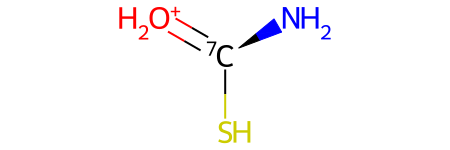

In [10]:
m = Chem.MolFromSmiles('N[7C@H]([OH2+])S')
m.GetBondWithIdx(1).SetBondType(Chem.rdchem.BondType.DOUBLE)
m

### RWMol 类

RDKit 的 `Chem.rdchem.RWMol` 类用于读取与写入分子，定义了更复杂的修改分子的功能，用于修改分子的操作包括

- `AddAtom(atom)`：在分子中添加原子。
- `AddBond(beginAtomIdx, endAtomIdx)`：在指定的始末位置间添加化学键。
- `InsertMol(mol)`：在分子中添加现成分子。
- `RemoveAtom(int)`：移除分子中指定位置的原子。
- `RemoveBond(int, int)`：移除分子中指定始末位置间的化学键。
- `ReplaceAtom(index, atom)`：使用指定原子替换索引位置上的原子。
- `ReplaceBond(index, bond)`：使用指定化学键替换索引位置上的化学键。

使用 RWMol 中修改分子的操作，首先要创建 `RWMol` 类。

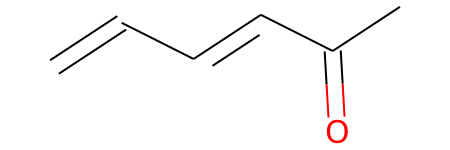

In [11]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
mw = Chem.RWMol(m)
mw

使用 `AddAtom()`添加原子后，所添加的原子不会与原来分子相连，通常需要搭配 `AddBond()` 方法。使用 `AddBond()` 添加化学键时，还可以设定参数 `order`，设置为 `Chem.rdchem.BondType` 类型，可以指定化学键类型。

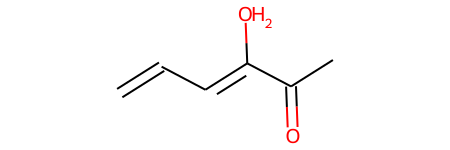

In [12]:
mw.AddAtom(Chem.Atom(8))
mw.AddBond(3, 7, order=Chem.rdchem.BondType.UNSPECIFIED)
mw

与 `Atom` 类不同，由于在 Python 中无法实例化 `Bond` 类，必须通过 `GetBonds()` 等方法从分子其他部分复制化学键后再用于替换。`ReplaceBond()` 中需要指定化学键的索引，可以通过以下方式得到。

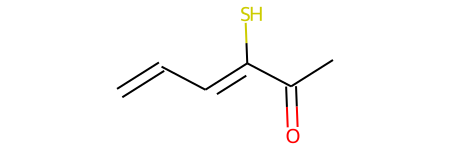

In [13]:
mw.ReplaceAtom(7, Chem.Atom(16))
mw.ReplaceBond(mw.GetBondBetweenAtoms(3, 7).GetIdx(), mw.GetBondBetweenAtoms(0, 1))
mw


其他操作也大同小异，需要注意在原始分子中增删原子后，可能导致原子索引发生变化。

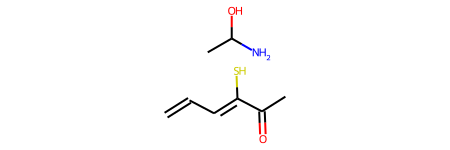

In [14]:
mw.InsertMol(Chem.MolFromSmiles('OC(N)C'))
mw

修改完成后，需要将 `RWMol` 类转换为 `Mol` 对象。

In [15]:
m_edit = mw.GetMol()
type(m_edit)

rdkit.Chem.rdchem.Mol

## 搜索子结构

### 搜索单个分子

- `HasSubstructMatch(pattern)`：指定分子结构中是否具有 pattern 目标结构。
- `GetSubstructMatch(pattern)`：给出分子中 pattern 目标结构的原子索引。
- `GetSubstructMatches(pattern)`：给出分子中所有 pattern 目标结构的原子索引。

在搜索子结构时，即使在 pattern 中具有立体化学标记，也不考虑分子立体化学的匹配。若要考虑立体化学，需要指定参数 `useChirality=True`。


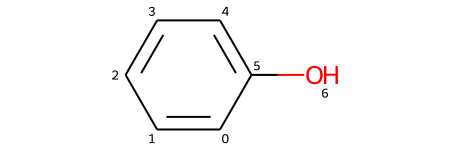

In [16]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG


m = Chem.MolFromSmiles('c1ccccc1O')
patt = Chem.MolFromSmarts('ccO')

d = rdMolDraw2D.MolDraw2DSVG(450, 150)
do = d.drawOptions()
do.addAtomIndices = True
d.DrawMolecule(m)
d.FinishDrawing()
SVG(d.GetDrawingText())

In [17]:
print(m.HasSubstructMatch(patt))
print(m.GetSubstructMatch(patt))
print(m.GetSubstructMatches(patt))

True
(0, 5, 6)
((0, 5, 6), (4, 5, 6))


也可以通过 `MolFragmentToSmiles()` 输出匹配子结构的 SMILES。

In [18]:
print(Chem.MolFragmentToSmiles(m, atomsToUse=m.GetSubstructMatch(patt), rootedAtAtom=0))

ccO


### 搜索多个分子

利用 `HasSubstructMatch()` 的特性，可以轻松地搜索多个分子并将相应分子加入列表。pattern 子结构也可以使用 SMILES 表示，但 SMILES 的功能较 SMARTS 有限，许多结构无法表示出来。

In [19]:
patt = Chem.MolFromSmiles('c1ccccc1')
with Chem.SDMolSupplier("./mols.sdf") as suppl:
    matches = [x for x in suppl if x.HasSubstructMatch(patt)]
len(matches)

1

### 为子结构着色

由于 `GetSubstructMatch()` 得到的是原子索引，还需要迭代获取子匹配子结构的化学键索引。首先通过 `patt.GetBonds()` 遍历子结构中的化学键，再通过 `hit_atom` 将化学键首末端原子映射为完整分子中的索引。因为 `hit_atom` 是元组，元组中元素的位置即子结构中的索引，而元素的值就是完整分子中的索引，所以可以像字典一样使用。再通过 `GetBondBetweenAtoms(begin, end)` 获取首末原子间的化学键，使用 `GetIdx()` 获筛键索引，即可高亮绘制出子结构。

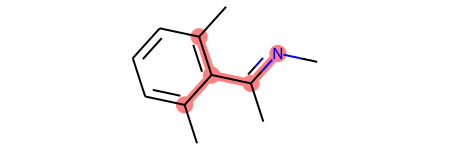

In [20]:
from rdkit.Chem import Draw


m = Chem.MolFromSmiles('Cc1cccc(C)c1C(C)=NC')
patt = Chem.MolFromSmarts( '[cH0:1][c:2]([cH0])!@[CX3!r:3]=[NX2!r:4]' )

hit_atom = m.GetSubstructMatch(patt)
hit_bond = []
for bond in patt.GetBonds():
    begin = hit_atom[bond.GetBeginAtomIdx()]
    end = hit_atom[bond.GetEndAtomIdx()]
    hit_bond.append(m.GetBondBetweenAtoms(begin, end).GetIdx())

Draw.MolToImage(m, size=(450, 150), highlightAtoms=hit_atom, highlightBonds=hit_bond)

---

## Reference

- [Getting Started with the RDKit in Python - RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [@dreadlesss/rdkit_summary/modifying_molecules - Github](https://github.com/dreadlesss/rdkit_summary/blob/master/modifying_molecules.ipynb)
- [@dreadlesss/rdkit_summary/substructure_search_and_highlight - Github](https://github.com/dreadlesss/rdkit_summary/blob/master/substructure_search_and_highlight.ipynb)
